<a href="https://colab.research.google.com/github/Manahil019/Cardiovascular-Machine-Learning-Model/blob/main/Cardiovascular_ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/Manahil019/Cardiovascular-ML-Model.git

fatal: destination path 'Cardiovascular-ML-Model' already exists and is not an empty directory.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance

In [ ]:
heart_data=pd.read_csv('/content/data cvs.csv')

In [ ]:
X = heart_data.drop(columns='target',axis=1)
y = heart_data['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#print last 5 rows of the dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
# number of row and colums in the dataset
heart_data.shape

(303, 14)

In [ ]:
# getting some info about the dataset
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# checking from missing values
heart_data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
# statistical measures about the dataset
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# checking the distribution of target Variable
heart_data['target'].value_counts()

,count
target,
1,165
0,138


In [ ]:
models = [
    ("Random Forest", RandomForestClassifier(n_estimators=100, random_state=42)),
    ("Logistic Regression", LogisticRegression(max_iter=1000)),
    ("K-Nearest Neighbors", KNeighborsClassifier()),
    ("Support Vector Machine", SVC(probability=True)),
    ("Neural Network", MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000))
]

results = []
for name, model in models:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    if hasattr(model, 'predict_proba'):
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
        auc = roc_auc_score(y_test, y_pred_proba)
    else:
        auc = None
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    results.append((name, accuracy_score(y_test, y_pred), auc, cm, cr))

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
print("Model Comparison:")
print("---------------")
for name, accuracy, auc, cm, cr in results:
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"AUC: {auc:.3f}")
    print(f"Confusion Matrix:\n{cm}")
    print(f"Classification Report:\n{cr}")
    print("---")

Model Comparison:
---------------
Model: Random Forest
Accuracy: 0.836
AUC: 0.922
Confusion Matrix:
[[24  5]
 [ 5 27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

---
Model: Logistic Regression
Accuracy: 0.852
AUC: 0.927
Confusion Matrix:
[[25  4]
 [ 5 27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

---
Model: K-Nearest Neighbors
Accuracy: 0.902
AUC: 0.915
Confusion Matrix:
[[27  2]
 

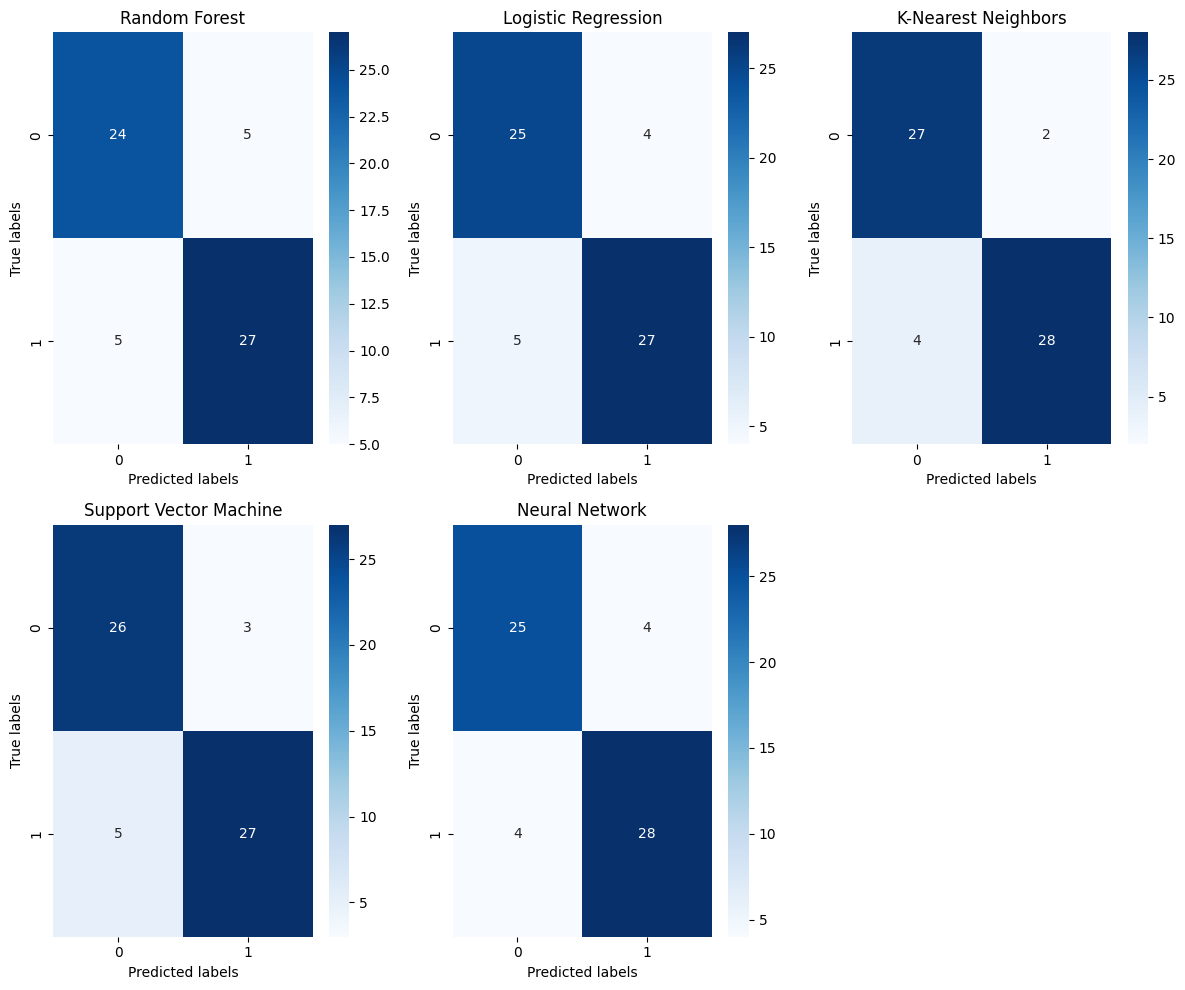

In [ ]:
plt.figure(figsize=(12, 10))
for i, (name, _, _, cm, _) in enumerate(results):
    plt.subplot(2, 3, i+1)
    sns.heatmap(cm, annot=True, cmap="Blues")
    plt.title(name)
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
plt.tight_layout()
plt.show()

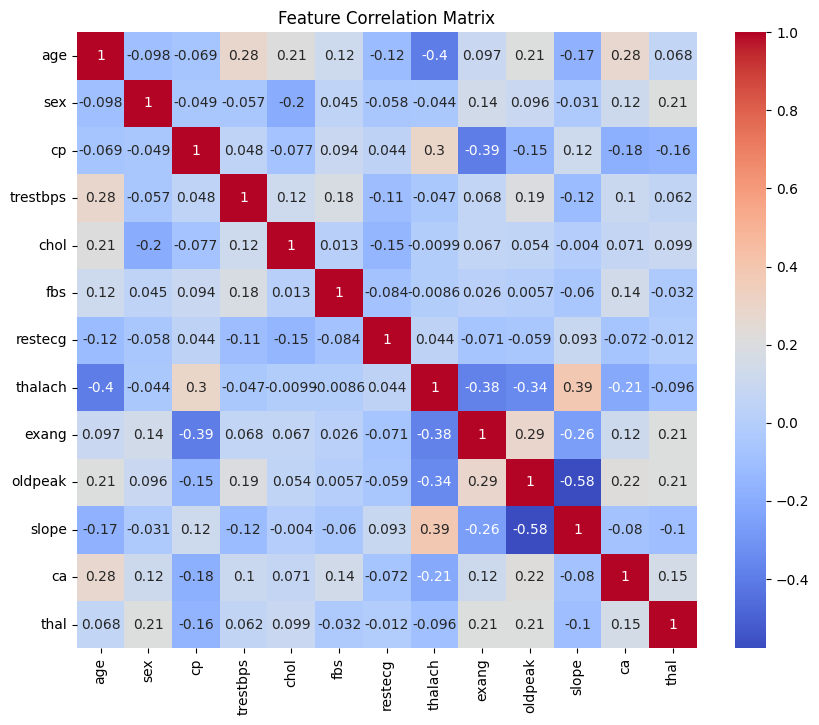

In [ ]:
corr_matrix = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


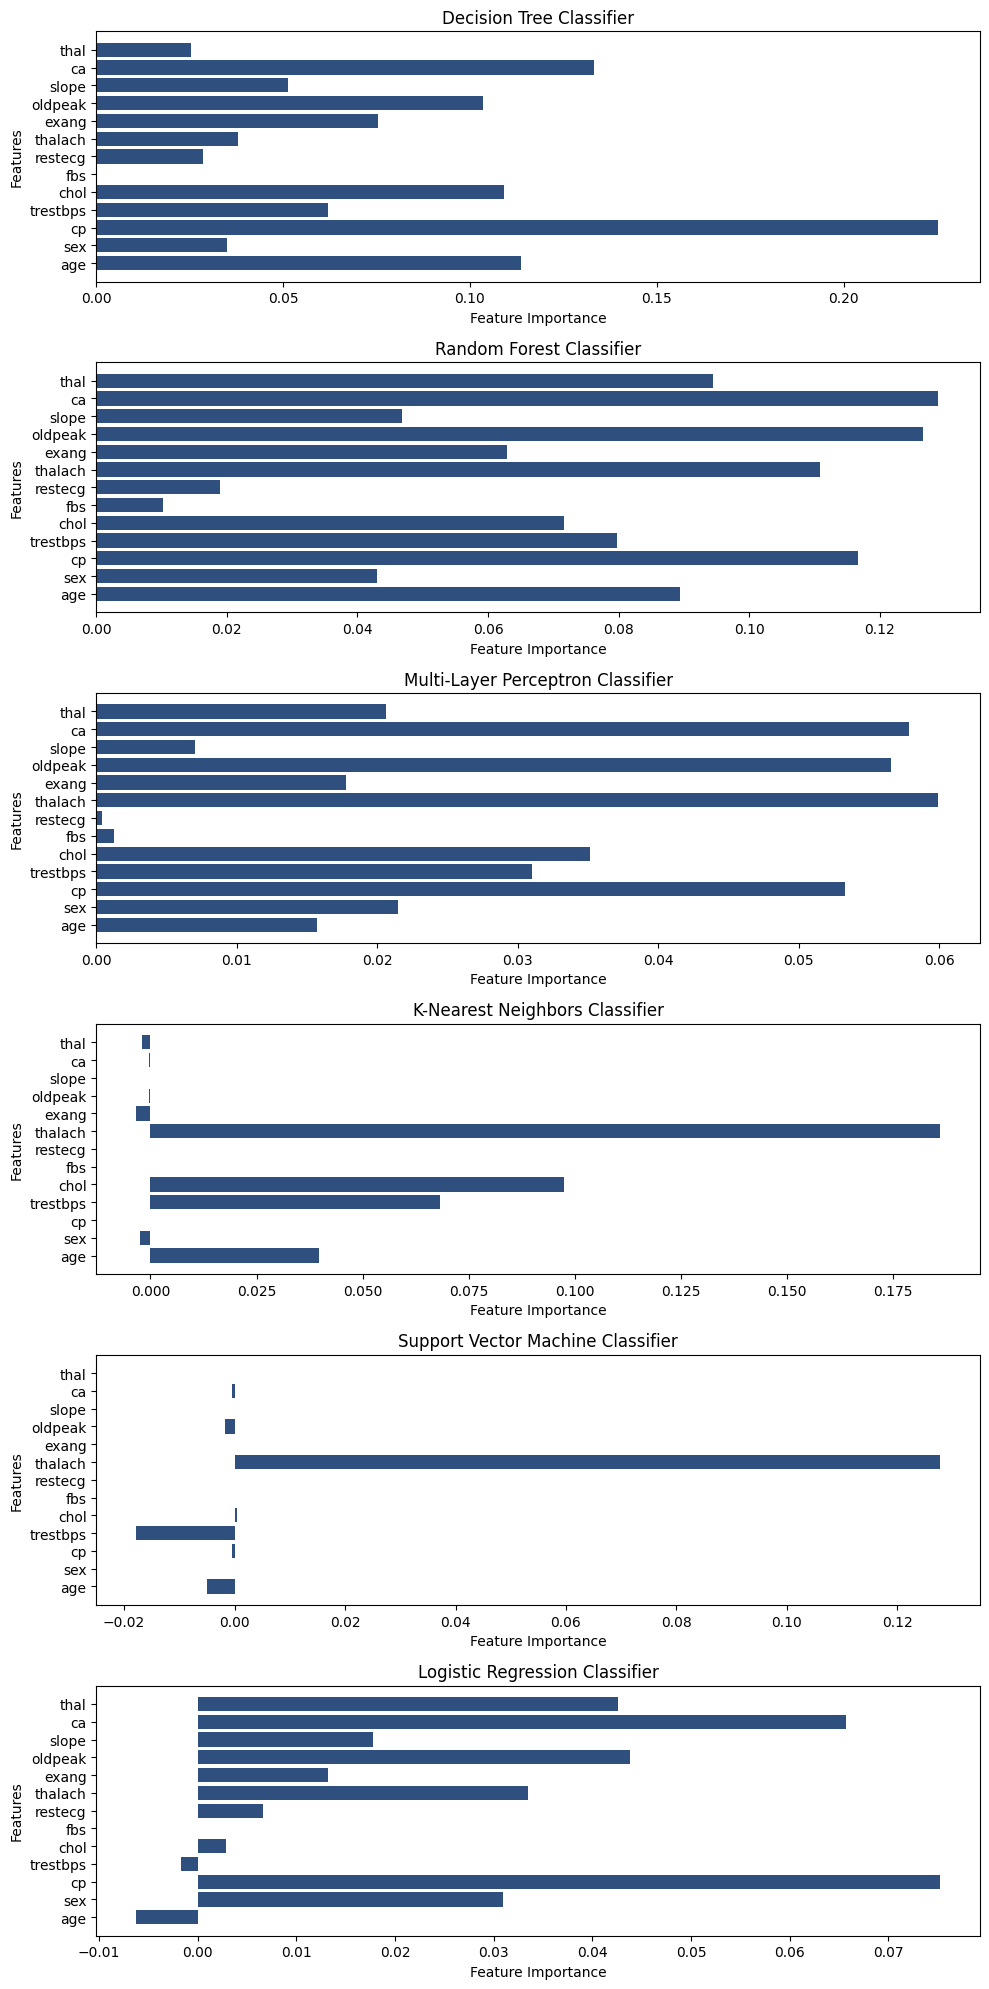

In [ ]:
# Define the algorithms
algorithms = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    MLPClassifier(),
    KNeighborsClassifier(),
    SVC(),
    LogisticRegression()
]

# Define the algorithm full names
algorithm_full_names = [
    'Decision Tree Classifier',
    'Random Forest Classifier',
    'Multi-Layer Perceptron Classifier',
    'K-Nearest Neighbors Classifier',
    'Support Vector Machine Classifier',
    'Logistic Regression Classifier'
]

# Create a figure and axis
fig, ax = plt.subplots(nrows=len(algorithms), ncols=1, figsize=(10, 20))

colors = ["#2f4f7f"] * len(algorithms)  # dark blue color

for i, algorithm in enumerate(algorithms):
    algorithm.fit(X_train, y_train)

    if hasattr(algorithm, 'feature_importances_'):
        feature_importances = algorithm.feature_importances_
    else:
        result = permutation_importance(algorithm, X_train, y_train, n_repeats=10, random_state=42)
        feature_importances = result.importances_mean

    ax[i].barh(X.columns, feature_importances, color=colors[i])
    ax[i].set_title(algorithm_full_names[i])
    ax[i].set_xlabel('Feature Importance')
    ax[i].set_ylabel('Features')

plt.tight_layout()
plt.show()